In [1]:
# Task 2 - Credit Card Fraud detection
# Task 3 - Customer Churn Prediction
# Task 4 - Spam SMS Detection

# <h><center><b>**CodSoft Internship Program**</b></center></h>
### <h><center><b>**TASK 4 - Spam SMS Detection**</b></center></h>

**GitHub Repository-** **https://github.com/anweshabose/CodSoft_Spam_SMS_Detection**

<h1><b>Spam SMS Detection Model</b></h1>

![](https://storage.googleapis.com/kaggle-datasets-images/3059849/5258192/a0bb33b17a1df9d576735341a9af24ef/dataset-cover.jpeg?t=2023-03-28-22-50-49)

# **Introduction**

Spam SMS detection is a key application of data science and machine learning that helps in protecting users from scams, fraud, and unnecessary disruptions. Many spam messages contain phishing attempts designed to steal personal information, financial details, or login credentials. Detecting and blocking these messages helps safeguard users from falling victim to fraud. Spam SMS can carry malicious links leading to malware infections or unauthorized access to sensitive data. Automated detection helps prevent security breaches and protects user privacy. Thus, Spam SMS detection is crucial for several reasons.

Machine learning has significantly enhanced Spam SMS detection by automating data processing and improving accuracy through statistical algorithms. Additionally, feature engineering—such as computing mean values for missing data—plays a crucial role in refining predictive accuracy.

Here, we have simply trained the model with some previous historical data and also checked the model's accuracy. We have used four different algorithms Logistic Regression, Decision Tree Classifier, Random Forest Classifier to train the model. Out of three algorithms, the best algorithm, that is whose accuracy is maximum, is used for predicting new data. So, there is an obvious 80% chance that it will provide the accurate result.

# **Project Outline**

**Steps that we follow:**

- Installing and importing all the required libraries.
- Importing the csv file.
- Data Description.
- Data Processing 
- i) Data Processing - Deleting all unnecessary elements from features
- ii) Data Processing - Finding and filling Missing Values
- Text Processing
- Feature Extraction using TF-IDF
- Prepare the Dataset for ML Training
- Model 1: Naive Bayes
- Model 2: Logistic Regression
- Model 3: SVM
- Evaluate the Best Model (Performance Evaluation)
- Summary

# Installing and importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Importing the CSV file

In [6]:
df = pd.read_csv("spam.csv")
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Description

In [7]:
df.describe()

,v1,v2
count,5001,4998
unique,3,4659
top,ham,"Sorry, I'll call later"
freq,4326,26


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5001 non-null   object
 1   v2      4998 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [9]:
df.shape

(5001, 2)

In [10]:
df.v1.value_counts()

v1
ham     4326
spam     673
ham"       2
Name: count, dtype: int64

# Data Processing

# i) Data Processing - Deleting all unnecessary elements from features

In [11]:
df.v1.value_counts()

v1
ham     4326
spam     673
ham"       2
Name: count, dtype: int64

In [12]:
df = df[df['v1'] != 'ham"']

In [13]:
df.v1.value_counts()

v1
ham     4326
spam     673
Name: count, dtype: int64

# ii) Data Processing - Finding and filling Missing Values

In [14]:
df.isnull().sum()

v1    0
v2    1
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

# Text Processing

Building an AI model to classify SMS messages as spam or legitimate involves text preprocessing, feature extraction, and classification using machine learning techniques like TF-IDF, word embeddings, and classifiers such as Naïve Bayes, Logistic Regression, or SVM. Here's a step-by-step guide:

In [17]:
# Text preprocessing: Removing special characters and lowercasing
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['v2'] = df['v2'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anwesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df["v1"].unique()

array(['ham', 'spam'], dtype=object)

In [19]:
ord_encoder = OrdinalEncoder(categories = [['ham', 'spam']])
df["v1"] = ord_encoder.fit_transform(df[["v1"]])

In [20]:
df.head(5)

,v1,v2
0,0.0,go jurong point crazy available bugis n great ...
1,0.0,ok lar joking wif u oni
2,1.0,free entry 2 wkly comp win fa cup final tkts 2...
3,0.0,u dun say early hor u c already say
4,0.0,nah think goes usf lives around though


### Thus, entire dataset and texts are processed.

# Feature Extraction using TF-IDF

Feature Extraction using TF-IDF and Feature Scaling serve different purposes in machine learning:

Feature Extraction using TF-IDF
- Purpose: Converts text data into numerical features for machine learning models.
- How it works: TF-IDF (Term Frequency-Inverse Document Frequency) assigns weights to words based on their importance in a document relative to the entire dataset.
- Example: Words frequently appearing in a document but rarely in others get higher weights, helping models focus on meaningful terms.
- Use case: Commonly used in spam detection, sentiment analysis, and text classification.

Feature Scaling
- Purpose: Normalizes numerical features to ensure they have a consistent range, preventing models from being biased toward large values.
- How it works: Methods like StandardScaler (z-score normalization) and Min-Max Scaling adjust feature values to a standard range.
- Example: If a dataset has age (0-100) and income (0-1,000,000), scaling ensures both features contribute equally to model training.
- Use case: Essential for algorithms like Logistic Regression, KNN, and Neural Networks.


In [21]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting vocabulary size
vectorized_features = vectorizer.fit_transform(df['v2'])  # Select correct text column

In [22]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df.drop('v1', axis=1))

In [23]:
# Convert to DataFrame
X = pd.DataFrame(vectorized_features.toarray())  # X: Independent variable
y = df["v1"]   # y: Dependent variable

In [24]:
# X = pd.DataFrame(scaled_features, columns=df.drop(columns=["v1"]).columns)  # X: Independent variable
# y = df["v1"]   # y: Dependent variable

# Prepare the Dataset for ML Training
Preparing the dataset is essential because we don't have to train the entire dataset. Maximum part of the dataset will be used for training and remaining part will be used for testing the accuracy. 
If Accuracy is not met then we have to tune the model or else we have to change the algorithm.

In [25]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(df.shape)
print(X_train.shape)
print(y_train.shape)

(4998, 2)
(3998, 5000)
(3998,)


# **Model 1: Naive Bayes**

In [27]:
# Model Training: Here, we are training the model with X_train and y_train
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [28]:
# Predicting the trained-model on X_test to get the predicted values of y.
nb_y_preds = nb_model.predict(X_test)

In [29]:
# Naive Bayes accuracy score: checking whether predicted values of y is equal to Actual values of y.
nb_accuracy = accuracy_score(y_test, nb_y_preds)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.98


### Accuracy: 0.98 means there is 98% match between Actual values of y and Predicted values of y.

In [30]:
print("Classification Report of Naive Bayes:")
print(classification_report(y_test, nb_y_preds))

Classification Report of Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       873
         1.0       1.00      0.85      0.92       127

    accuracy                           0.98      1000
   macro avg       0.99      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [31]:
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_y_preds))

Confusion Matrix:
 [[873   0]
 [ 19 108]]


# **Model 2: Logistic Regression**

In [32]:
# Model Training: Here, we are training the model with X_train and y_train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predicting the trained-model on X_test to get the predicted values of y.
logistic_y_preds = log_model.predict(X_test)

In [34]:
# Logistic accuracy score: checking whether predicted values of y is equal to Actual values of y.
log_accuracy = accuracy_score(y_test, logistic_y_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 0.96


### Accuracy: 0.96 means there is 96% match between Actual values of y and Predicted values of y.

In [35]:
print("Classification Report of Logistic Reg:")
print(classification_report(y_test, logistic_y_preds))

Classification Report of Logistic Reg:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       873
         1.0       0.99      0.66      0.79       127

    accuracy                           0.96      1000
   macro avg       0.97      0.83      0.88      1000
weighted avg       0.96      0.96      0.95      1000



In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_y_preds))

Confusion Matrix:
 [[872   1]
 [ 43  84]]


# **Model 3: SVM**

In [37]:
# Model Training: Here, we are training the model with X_train and y_train
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [38]:
# Predicting the trained-model on X_test to get the predicted values of y.
svm_y_preds = svm_model.predict(X_test)

In [39]:
# SVM accuracy score: checking whether predicted values of y is equal to Actual values of y.
svm_accuracy = accuracy_score(y_test, svm_y_preds)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.98


### Accuracy: 0.98 means there is 98% match between Actual values of y and Predicted values of y.

In [40]:
print("Classification Report of SVM:")
print(classification_report(y_test, svm_y_preds))

Classification Report of SVM:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       873
         1.0       0.99      0.88      0.93       127

    accuracy                           0.98      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_preds))

Confusion Matrix:
 [[872   1]
 [ 15 112]]


## Evaluate the Best Model (Performance Evaluation)

In [42]:
accuracy_list = []
precision_list = []
f1_score_list = []
recall_list = []

In [43]:
# Naive Bayes

accuracy_list.append(accuracy_score(y_test, nb_y_preds))
precision_list.append(precision_score(y_test, nb_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, nb_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, nb_y_preds, average='weighted'))

In [44]:
# Logistic Regression

accuracy_list.append(accuracy_score(y_test, logistic_y_preds))
precision_list.append(precision_score(y_test, logistic_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, logistic_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, logistic_y_preds, average='weighted'))

In [45]:
# SVM

accuracy_list.append(accuracy_score(y_test, svm_y_preds))
precision_list.append(precision_score(y_test, svm_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, svm_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, svm_y_preds, average='weighted'))

In [46]:
print(accuracy_list)
print(precision_list)
print(recall_list)
print(f1_score_list)

[0.981, 0.956, 0.984]
[0.9814047085201794, 0.9574796528447445, 0.9841128592950285]
[0.981, 0.956, 0.984]
[0.9803341811825689, 0.952158287957452, 0.9835969696969697]


In [47]:
labels = ['Naive Bayes', 'Logistic Reg', 'SVM']

Text(0.5, 1.0, 'F1 Score')

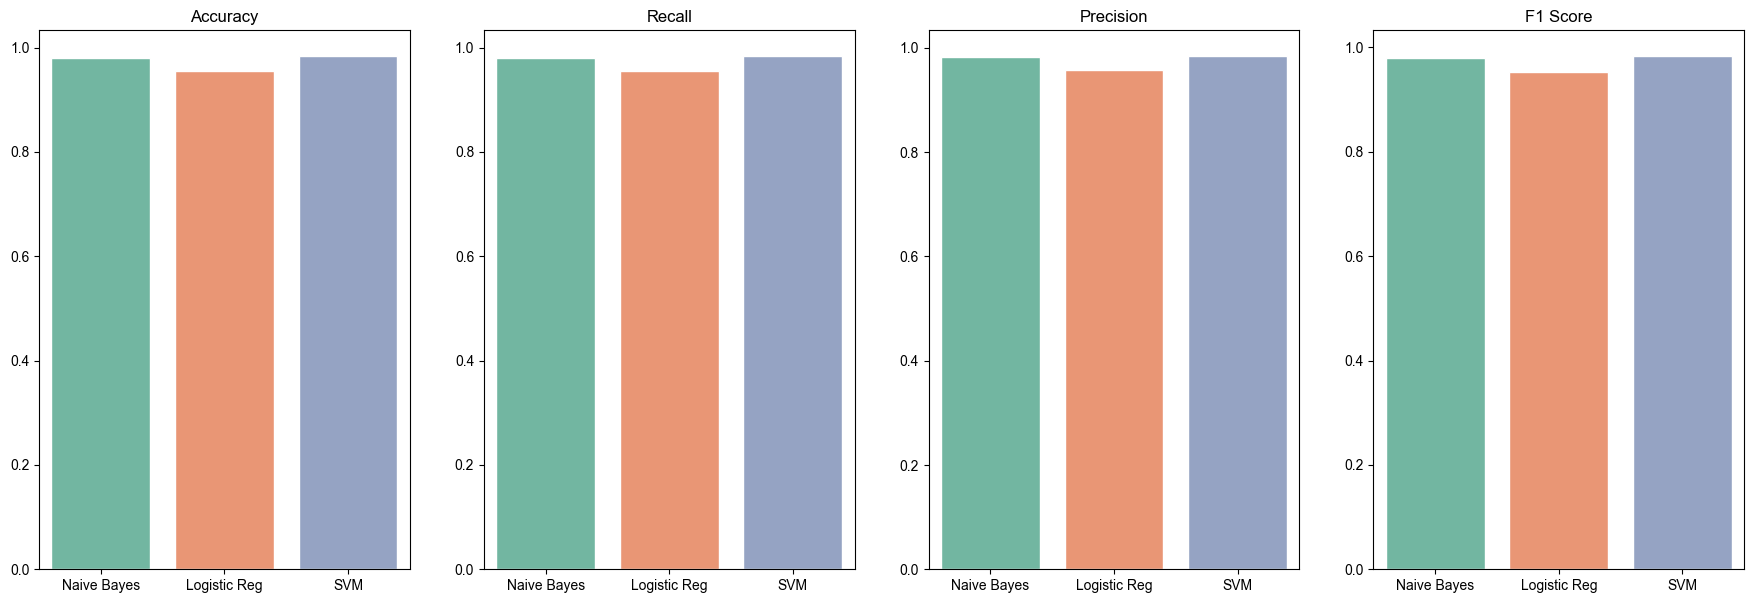

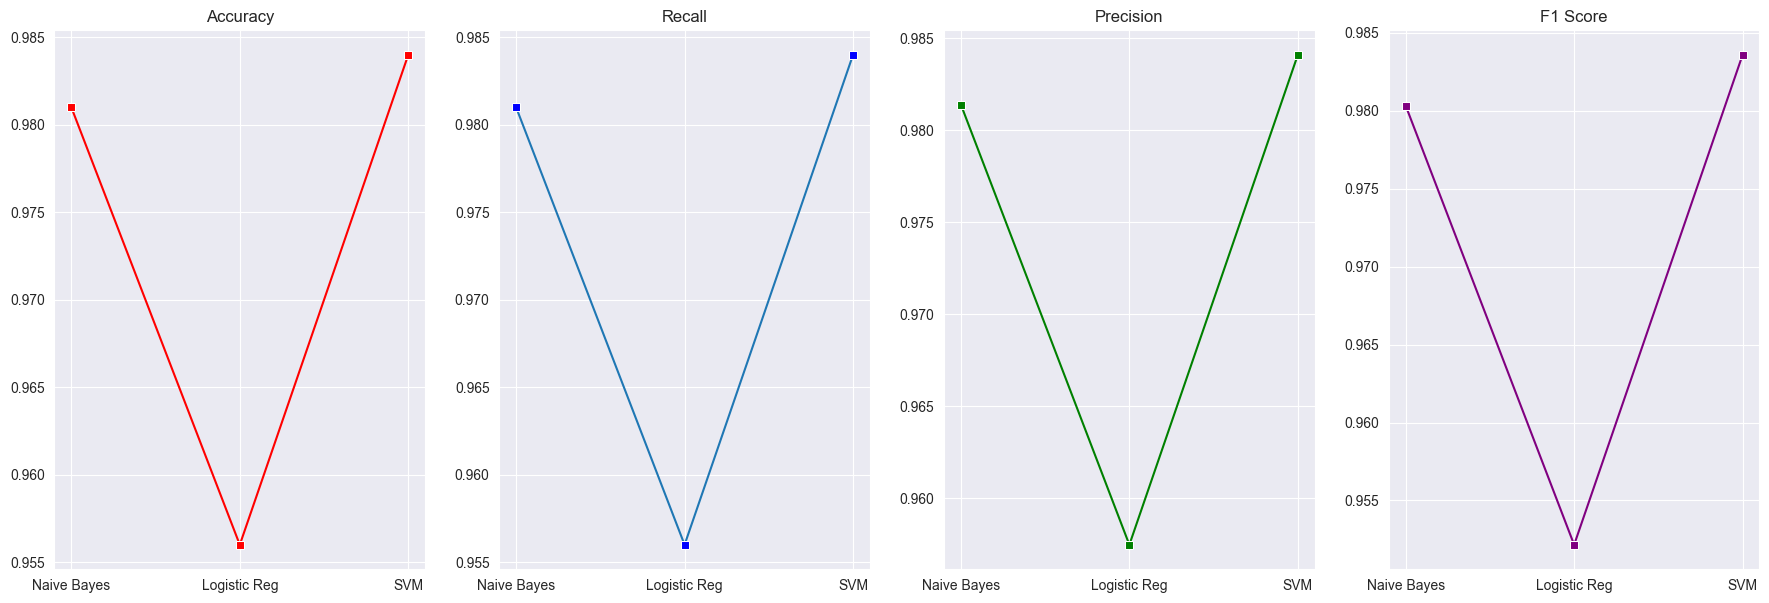

In [48]:
fig, ax = plt.subplots(1, 4, figsize = (22, 7))
sns.set_style('darkgrid')
sns.barplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0]).set_title("Accuracy")
sns.barplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1]).set_title("Recall")
sns.barplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2]).set_title("Precision")
sns.barplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3]).set_title("F1 Score")

fig, ax = plt.subplots(1, 4, figsize=(22, 7))
sns.set_style('darkgrid')
sns.lineplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0], marker = 's', color = 'red').set_title("Accuracy")
sns.lineplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1], marker = 's', markerfacecolor = 'blue').set_title("Recall")
sns.lineplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2], marker = 's', color = 'green').set_title("Precision")
sns.lineplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3], marker = 's', color = 'purple').set_title("F1 Score")

### *In conclusion, the Spam SMS Detection using machine learning algorithms, specifically Naive Bayes, Logistic Regression, and SVM, has provided valuable insights into their performance. Through rigorous evaluation and comparison, it is evident that Naive Bayes & SVM emerges as the most effective algorithm among the three for Detecting Spam SMS.*

## **THANK YOU**